In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = (pd.read_csv("/content/Iris.csv").drop("Id", axis="columns"))

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
category = pd.get_dummies(df["Species"])
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
new_df = pd.concat([df, category], axis="columns")
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [6]:
new_df.drop("Species", axis="columns", inplace=True)

In [7]:
new_df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


In [8]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [9]:
X = dataset[:, 0:4]
y = dataset[:, 4:7]

## Preprocessing Data -> Normalisasi dengan MinMaxScaller

In [10]:
minmax = MinMaxScaler()
X_scale = minmax.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Dataset Splitting -> Membagi data ke data train dan data testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

## Arsitektur Model

In [12]:
model = Sequential([
                    Dense(64, "relu", input_shape=(4,)),
                    Dense(64, "relu"),
                    Dense(3, "softmax")
])

## Criterion atau Compile

In [13]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Training

In [14]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 15s 5ms/step - loss: 1.0774 - accuracy: 0.3361
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0454 - accuracy: 0.4540
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0096 - accuracy: 0.6382
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.6406
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9696 - accuracy: 0.6396
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9366 - accuracy: 0.6635
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9152 - accuracy: 0.6490
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.6458
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.6979
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8239 - accuracy: 0.6313
Epoch 11/100
4/4 [==========

## Evaluasi Model

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 7ms/step - loss: 0.0746 - accuracy: 1.0000


[0.07463192939758301, 1.0]

## Plotting Grafik Loss dan Accuracy

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("talk")

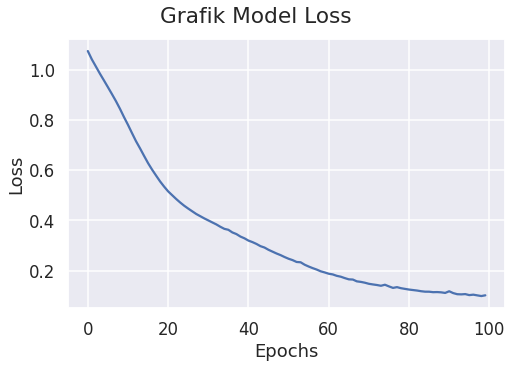

In [17]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
fig.suptitle("Grafik Model Loss")
_ = plt.plot(hist.history["loss"])
_ = ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Loss")

plt.show()

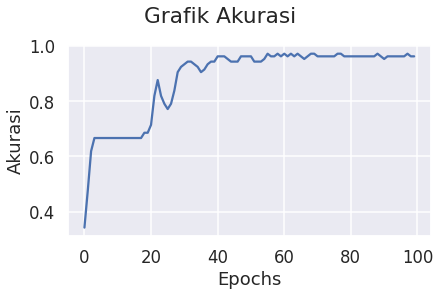

In [18]:
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
fig.suptitle("Grafik Akurasi")
_ = plt.plot(hist.history["accuracy"])
_ = ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Akurasi")
plt.show()

## Menggunakan Callbacks

In [19]:
from tensorflow.keras.callbacks import Callback

In [20]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get("accuracy")>0.98):
      print("\nAkurasi sudah diatas 98%")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
model.fit(X_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9714
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9619
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9619
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9619
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9524
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9619
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9619
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9619
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9619
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9619
Epoch 11/100
4/4 [===========